# AI-Powered Resume Screening System - Backend Development Notebook

#### This notebook covers the backend development for the AI-Powered Resume Screening System, including:
1. Data loading and preprocessing for jobs and resumes.
2. **User CV Upload (Google Colab)**
3. Model implementation (Gemini Pro, Custom LSTM, Fine-tuned Transformer).
4. Visualization and Comparison of model performances.



In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue May 13 12:16:44 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Install Necessary Libraries

In [2]:
!pip install pandas numpy matplotlib seaborn plotly wordcloud scikit-learn python-dotenv google-generativeai pdfplumber docx2txt transformers datasets accelerate torch kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.

In [3]:
!pip install --force-reinstall tensorflow==2.19.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 130.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 125.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 95.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 132.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 123.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319

## 1. Setup and Imports

In [1]:
import os
import re
import json
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import io  # For handling file streams

# Google Colab
from google.colab import files
from google.colab import userdata # For Colab Secrets

# Gemini
import google.generativeai as genai


import tensorflow as tf

from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Concatenate, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


# Transformer (Hugging Face)
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset, DatasetDict
import torch
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Resume parsing
import pdfplumber
import docx2txt

In [2]:
print(f"TensorFlow version: {tf.__version__}")
print(f"Using GPU: {'Yes' if tf.config.list_physical_devices('GPU') else 'No'}")
print(f"Using CUDA: {'Yes' if tf.test.is_built_with_cuda() else 'No'}")
print(Sequential)

TensorFlow version: 2.19.0
Using GPU: Yes
Using CUDA: Yes
<class 'keras.src.models.sequential.Sequential'>


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# %cd "/content/drive/MyDrive/Colab Notebooks/AI-Powered-Resume-Scanning-System"

/content/drive/MyDrive/Colab Notebooks/AI-Powered-Resume-Scanning-System


In [5]:
# Output directory
OUTPUT_DIR = "outputs"
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)
print(f"Output directory set to: {OUTPUT_DIR}")

# Plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("muted")

Output directory set to: outputs


### 1.1 Configure API Keys (Gemini)
#### Using Colab Secrets for the Gemini API Key.


In [6]:
try:
    GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')
    if not GEMINI_API_KEY:
        print("GEMINI_API_KEY not found in Colab Secrets. Please add it.")
        gemini_pro_model = None
    else:
        print("GEMINI_API_KEY loaded successfully from Colab Secrets.")
        genai.configure(api_key=GEMINI_API_KEY)
        gemini_pro_model = genai.GenerativeModel(model_name="gemini-2.0-flash")
        print("Gemini Pro model configured.")
except Exception as e:
    print(f"Error configuring Gemini (is API key set in Colab Secrets?): {e}")
    gemini_pro_model = None

GEMINI_API_KEY loaded successfully from Colab Secrets.
Gemini Pro model configured.


## 2. Load Job Data


In [7]:
# Define paths
JOB_CSV_PATH = "job_dataset.csv"

# Load job dataset
try:
    job_df = pd.read_csv(JOB_CSV_PATH)
    print("Job dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: Job dataset not found at {JOB_CSV_PATH}. Please upload it to your Colab session.")
    job_df = pd.DataFrame()

if not job_df.empty:
    print(f"\nShape of job_df: {job_df.shape}")
    print("\nFirst 5 rows of job_df:")
    # print(job_df.head())
    display(job_df.head())
else:
    print("Job DataFrame is empty. Many subsequent steps might fail or produce no results.")

Job dataset loaded successfully.

Shape of job_df: (142, 11)

First 5 rows of job_df:


,Job Title,Company Name,Job Description,Location,Job Type,Salary Range,Experience Level,Skills Required,Industry,Posted Date,Employment Mode
0,Mobile App Developer,"Rodriguez, Figueroa and Sanchez",We are seeking a entry level Mobile App Develo...,"Lake Curtis, Saint Vincent and the Grenadines",Full-time,$84k - $96k,Entry,"SQL, Docker, UI Design, JavaScript",Manufacturing,4/12/2025,Remote
1,Cybersecurity Analyst,Garza Inc,We are seeking a entry level Cybersecurity Ana...,"North Jefferyhaven, Netherlands Antilles",Internship,$84k - $117k,Entry,"SQL, Python, NoSQL, Node.js",Technology,2/21/2025,On-site
2,DevOps Engineer,"Gonzalez, Santos and Gardner",We are seeking a senior level DevOps Engineer ...,"South Bridget, Sudan",Internship,$63k - $139k,Senior,"Agile, Data Analysis, Docker, React",Healthcare,2/19/2025,On-site
3,Backend Developer,Wolfe LLC,We are seeking a entry level Backend Developer...,"Ericmouth, Bosnia and Herzegovina",Full-time,$79k - $125k,Entry,"UI Design, NoSQL, Security, Python, TypeScript",Retail,2/28/2025,On-site
4,Data Scientist,Davis-Abbott,We are seeking a entry level Data Scientist to...,"Lindsaymouth, Martinique",Internship,$68k - $96k,Entry,"AWS, React, Python, Data Analysis, Node.js",Education,3/3/2025,Remote


In [8]:
job_df['Job Description'] = job_df['Job Description'].str.replace(r'\s+', ' ', regex=True).str.strip()

In [9]:
job_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Job Title         142 non-null    object
 1   Company Name      142 non-null    object
 2   Job Description   142 non-null    object
 3   Location          142 non-null    object
 4   Job Type          142 non-null    object
 5   Salary Range      142 non-null    object
 6   Experience Level  142 non-null    object
 7   Skills Required   142 non-null    object
 8   Industry          142 non-null    object
 9   Posted Date       142 non-null    object
 10  Employment Mode   142 non-null    object
dtypes: object(11)
memory usage: 12.3+ KB


In [10]:
job_df.describe()

,Job Title,Company Name,Job Description,Location,Job Type,Salary Range,Experience Level,Skills Required,Industry,Posted Date,Employment Mode
count,142,142,142,142,142,142,142,142,142,142,142
unique,17,127,132,133,5,141,3,125,7,61,3
top,Frontend Developer,TechNova Corp,We are seeking a Senior level Data Analyst to ...,"Bamako, Mali",Internship,$79k - $123k,Entry,"Machine Learning, Python, TensorFlow, R",Retail,4/1/2025,On-site
freq,14,8,5,3,38,2,50,8,25,6,56


### 2.1 Visualizing Job Data

In [11]:
# Job Title Distribution
job_counts = job_df['Job Title'].value_counts()
fig_job_title_pie = px.pie(values=job_counts.values, names=job_counts.index, title='Job Title Distribution' )
fig_job_title_pie.show()
fig_job_title_pie.write_image(os.path.join(OUTPUT_DIR, "job_title_distribution_pie.png"))
print("Saved job_title_distribution_pie.png")


Saved job_title_distribution_pie.png


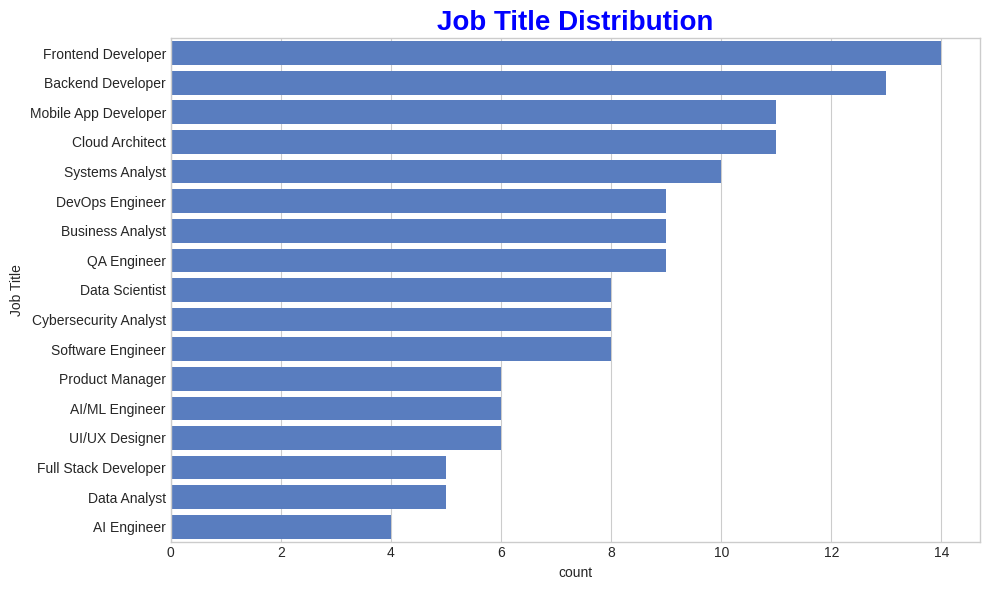

Saved job_title_frequency_bar.png


In [12]:
# Job Title Frequency (Bar plot)
plt.figure(figsize=(10, 6))
sns.countplot(data=job_df, y='Job Title', order=job_df['Job Title'].value_counts().index)
plt.title('Job Title Distribution', fontsize=20, fontweight='bold', color='blue', loc='center')
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "job_title_frequency_bar.png"))
plt.show()
print("Saved job_title_frequency_bar.png")


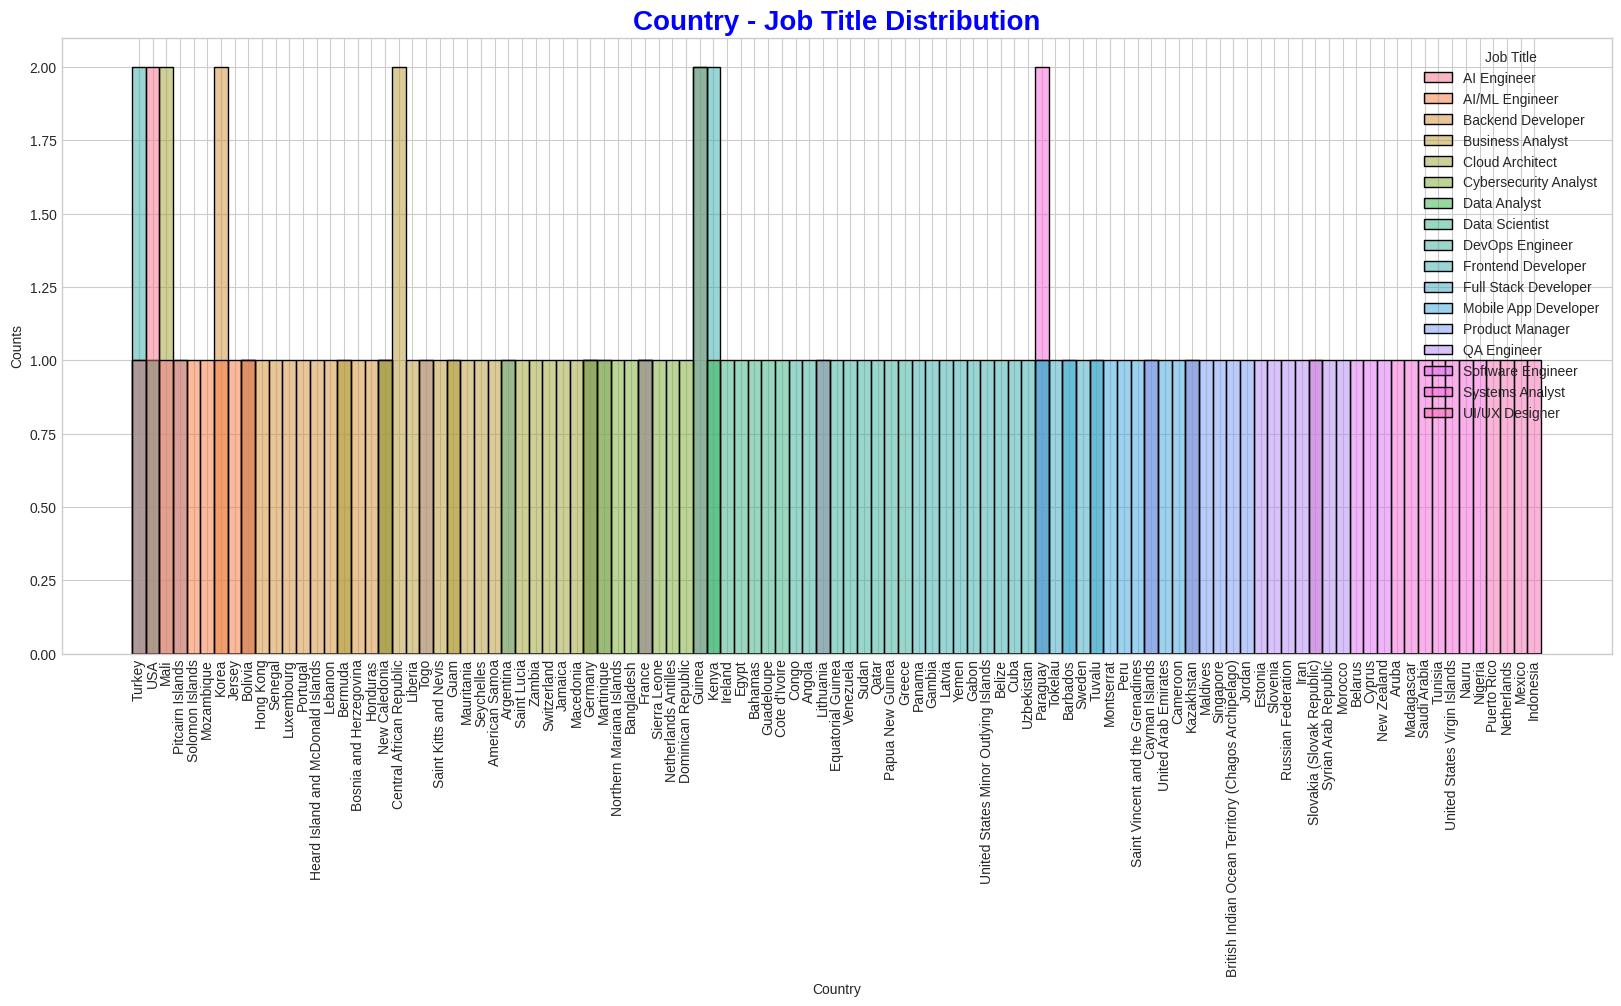

<Figure size 640x480 with 0 Axes>

In [13]:
# --- Job Title by Country ---
df = job_df.dropna(subset=['Job Title', 'Location'])

for index in df['Location'].index:
    #print(index, df['Location'][index].split(', ')[-1])
    #df['Location'][index] = df['Location'][index].split(', ')[-1]
    df.loc[index, 'Location'] = df['Location'][index].split(', ')[-1]

df =  df.sort_values(by='Job Title')


plt.figure(figsize = (20, 8))
sns.histplot(data = df, x = 'Location', hue = 'Job Title')
plt.title('Country - Job Title Distribution', fontsize = 20, fontweight = 'bold', color = 'blue', loc = 'center')
plt.xlabel('Country')
plt.ylabel('Counts')
plt.xticks(rotation = 90)
plt.show()
plt.savefig(os.path.join(OUTPUT_DIR, 'country_job_title.png'))

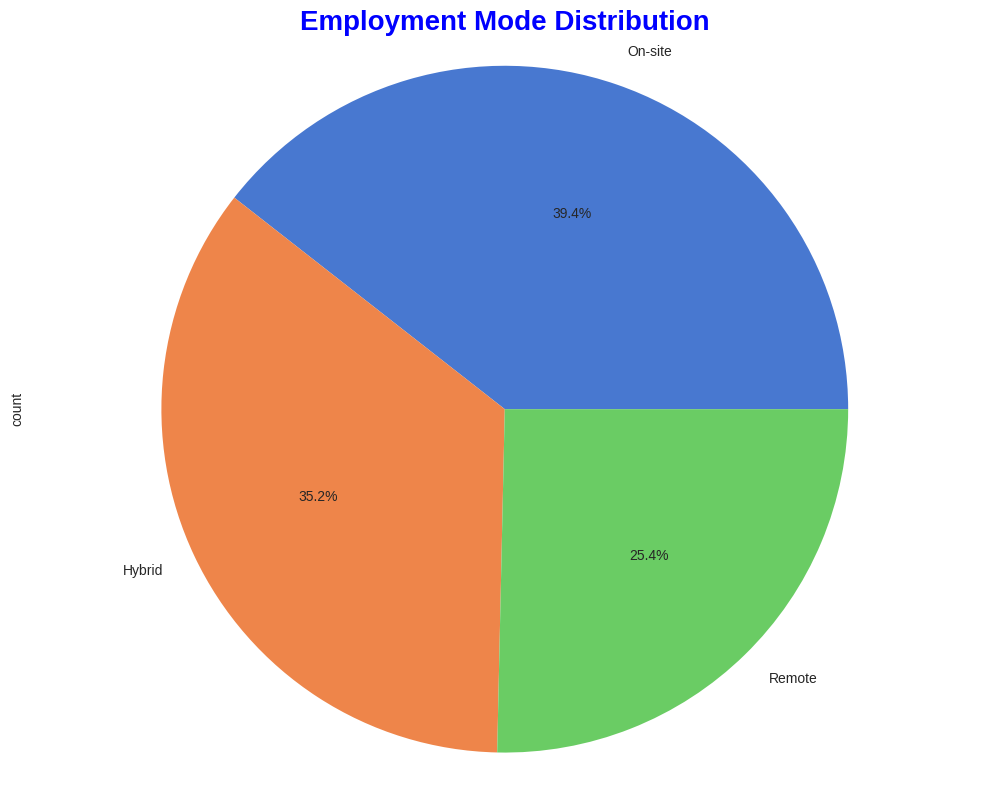

In [14]:
# --- Employment Mode Distribution ---
plt.figure(figsize=(10, 8))
df['Employment Mode'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Employment Mode Distribution', fontsize = 20, fontweight = 'bold', color = 'blue',loc = 'center')
plt.axis("equal")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, 'employment_mode.png'))
plt.show()

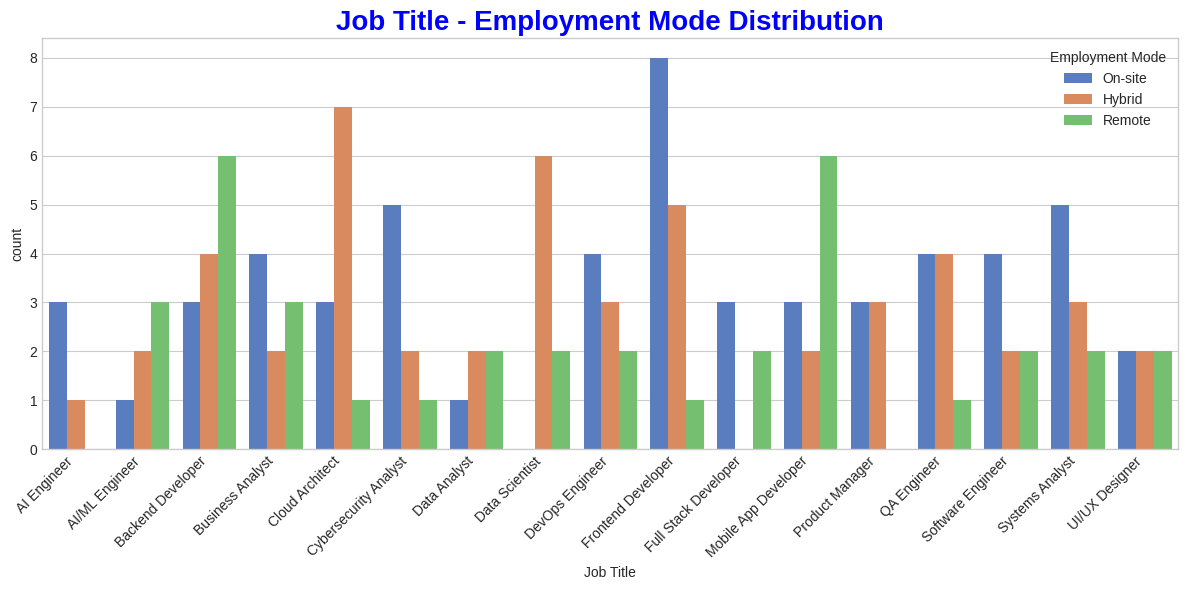

In [15]:
# --- Job Title by Employment Mode ---
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Job Title', hue='Employment Mode')
plt.title('Job Title - Employment Mode Distribution', fontsize = 20, fontweight = 'bold', color = 'blue',loc = 'center')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, 'job_title_employment_mode.png'))
plt.show()

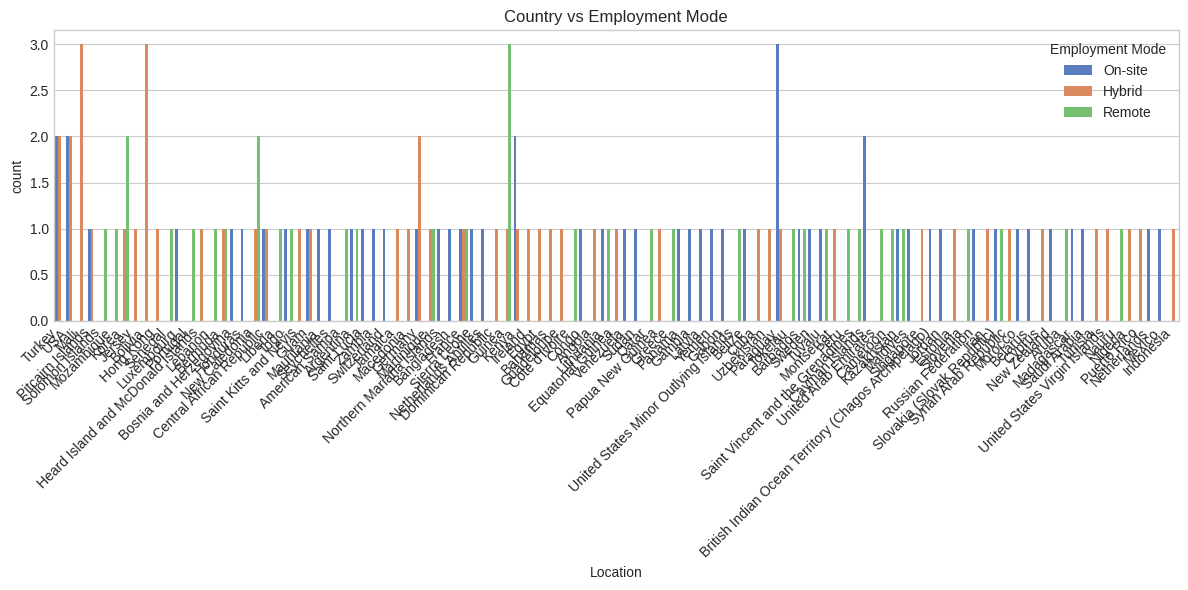

In [16]:
# --- Location vs Employment Mode ---
df_location_emp = df.dropna(subset=['Location', 'Employment Mode'])
df_location_emp['Location'] = df_location_emp['Location'].apply(lambda x: x.split(', ')[-1])
plt.figure(figsize=(12, 6))
sns.countplot(data=df_location_emp, x='Location', hue='Employment Mode')
plt.title('Country vs Employment Mode')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, 'location_employment_mode.png'))
plt.show()

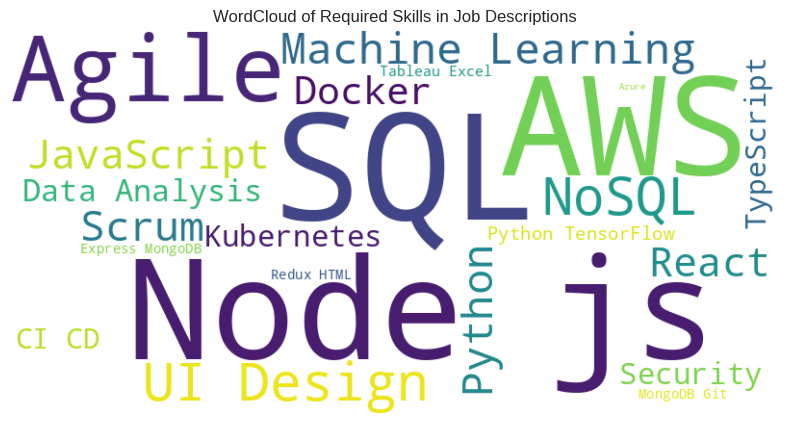

Saved skills_wordcloud_jobs.png


In [17]:
# WordCloud of Skills
if 'Skills Required' in job_df.columns:
  skills_text = ' '.join(job_df['Skills Required'].dropna().str.replace(',', ' '))
  if skills_text.strip(): # Check if there's any text to generate wordcloud
      wordcloud = WordCloud(width=800, height=400, background_color='white').generate(skills_text)
      plt.figure(figsize=(10, 5))
      plt.imshow(wordcloud, interpolation='bilinear')
      plt.axis('off')
      plt.title("WordCloud of Required Skills in Job Descriptions")
      plt.savefig(os.path.join(OUTPUT_DIR, "skills_wordcloud_jobs.png"))
      plt.show()
      print("Saved skills_wordcloud_jobs.png")
  else:
      print("No skills text available to generate word cloud.")

## 3. Resume Data (Sample Placeholders)

#### Sample resumes for development and testing. User CV upload is in the next section.

In [18]:
sample_resumes = [
    {
        "id": "resume_sample_swe",
        "text": """
        John Doe
        Software Engineer
        john.doe@email.com | (555) 123-4567 | linkedin.com/in/johndoe | github.com/johndoe

        Summary
        Innovative Software Engineer with 5+ years of experience in developing scalable web applications and services. Proficient in Python, Java, and JavaScript frameworks. Strong background in Agile methodologies and cloud computing (AWS). Proven ability to lead projects and collaborate effectively with cross-functional teams.

        Experience
        Senior Software Engineer | Tech Solutions Inc. | Jan 2020 – Present
        - Led a team of 5 engineers in developing a new microservices-based platform using Python (Django) and React.
        - Designed and implemented RESTful APIs, improving system performance by 20%.
        - Deployed applications on AWS (EC2, S3, Lambda).

        Skills
        Programming Languages: Python, Java, JavaScript, SQL, HTML, CSS
        Frameworks/Libraries: Django, Flask, React, Node.js, Express.js, Spring Boot
        Cloud: AWS (EC2, S3, Lambda, RDS), Docker
        """,
        "expected_skills": ["Python", "Java", "JavaScript", "React", "Node.js", "SQL", "AWS", "Docker", "Agile"]
    },
    {
        "id": "resume_sample_ds",
        "text": """
        Jane Smith
        Data Scientist
        jane.smith@email.com | linkedin.com/in/janesmith

        Summary
        Data Scientist with 3 years of experience specializing in machine learning, data analysis, and statistical modeling. Passionate about extracting actionable insights from complex datasets. Adept at using Python, R, and SQL for data manipulation and model building.

        Experience
        Data Scientist | Alpha Analytics | Aug 2021 – Present
        - Developed predictive models for customer churn, resulting in a 15% reduction in churn rate.
        - Utilized Python (pandas, scikit-learn, TensorFlow) and R for data analysis and machine learning.

        Skills
        Languages: Python, R, SQL
        Libraries: Pandas, NumPy, Scikit-learn, TensorFlow, Keras, Matplotlib
        Techniques: Machine Learning, Statistical Modeling, Data Visualization
        """,
        "expected_skills": ["Python", "R", "SQL", "Machine Learning", "TensorFlow", "Data Analysis"]
    }
]
print(f"Loaded {len(sample_resumes)} sample resumes placeholders.")
user_uploaded_cv_text = None
user_uploaded_cv_filename = None

Loaded 2 sample resumes placeholders.


## 4. User CV Upload (Google Colab)
#### This section allows you to upload your own CV (PDF or DOCX) for analysis.


In [19]:
def extract_text_from_file_bytes(file_bytes, filename):
    """Extracts text from PDF or DOCX file bytes."""
    text = ""
    file_extension = os.path.splitext(filename)[1].lower()

    try:
        if file_extension == ".pdf":
            with io.BytesIO(file_bytes) as pdf_file:
                with pdfplumber.open(pdf_file) as pdf:
                    for page in pdf.pages:
                        page_text = page.extract_text()
                        if page_text:
                            text += page_text + "\n"
        elif file_extension == ".docx":
            with io.BytesIO(file_bytes) as docx_file:
                text = docx2txt.process(docx_file)
        elif file_extension == ".doc":
             with io.BytesIO(file_bytes) as doc_file:
                text = docx2txt.process(doc_file)
        elif file_extension == ".txt":
            text = file_bytes.decode('utf-8', errors='ignore')
        else:
            print(f"Unsupported file type: {filename}. Please upload PDF, DOCX, or TXT.")
            return None
    except Exception as e:
        print(f"Error extracting text from {filename}: {e}")
        return None
    return text.strip()

print("Please upload your CV (PDF, DOCX, or TXT format).")
uploaded_files = files.upload()

if not uploaded_files:
    print("No file uploaded.")
else:
    user_uploaded_cv_filename = list(uploaded_files.keys())[0]
    cv_bytes = uploaded_files[user_uploaded_cv_filename]

    print(f"\nProcessing uploaded file: {user_uploaded_cv_filename}...")
    user_uploaded_cv_text = extract_text_from_file_bytes(cv_bytes, user_uploaded_cv_filename)

    if user_uploaded_cv_text:
        print(f"Successfully extracted text from {user_uploaded_cv_filename}.")

        sample_resumes.append({
            "id": "user_uploaded_cv",
            "text": user_uploaded_cv_text,
            "filename": user_uploaded_cv_filename,
            "expected_skills": []
        })
        print(f"\nYour CV has been added to the list of resumes for analysis (ID: user_uploaded_cv).")
    else:
        print(f"Could not extract text from {user_uploaded_cv_filename}. Please check the file format and content.")

Please upload your CV (PDF, DOCX, or TXT format).


Saving SEIDY_KANTE_Professional_Resume.docx to SEIDY_KANTE_Professional_Resume.docx

Processing uploaded file: SEIDY_KANTE_Professional_Resume.docx...
Successfully extracted text from SEIDY_KANTE_Professional_Resume.docx.

Your CV has been added to the list of resumes for analysis (ID: user_uploaded_cv).


## 5. Preprocessing Logic

In [20]:
COMMON_SKILLS_LIST = {
    "python", "java", "sql", "excel", "communication", "project management", "machine learning",
    "data analysis", "leadership", "problem solving", "aws", "docker", "kubernetes", "c++", "tensorflow",
    "reactjs", "react", "javascript", "html", "htm5", "css", "css3", "agile", "scrum", "git", "linux", "data visualization",
    "cybersecurity", "cloud computing", "devops", "artificial intelligence", "natural language processing",
    "nlp", "node.js", "nodejs", "expressjs", "django", "flask", "restful apis", "graphql", "nosql", "mongodb", "postgresql",
    "mysql", "data engineering", "big data", "hadoop", "spark", "etl", "business analysis", "digital marketing",
    "seo", "content creation", "social media marketing", "email marketing", "salesforce", "crm",
    "customer service", "negotiation", "time management", "critical thinking", "adaptability", "teamwork",
    "interpersonal skills", "public speaking", "presentation skills", "networking", "research skills",
    "financial analysis", "budgeting", "accounting", "risk management", "quality assurance", "testing",
    "user experience", "ui/ux design", "ui", "ux", "graphic design", "adobe creative suite", "video editing",
    "english", "spanish", "french", "german", "mandarin", "japanese", "korean", "russian",
    "turkish", "arabic",
    "github", "jira", "trello", "slack", "zoom", "microsoft teams", "notion", "tailwind css", "tailwind","typescript",
    "tailwindcss", "figma", "sketch", "adobe xd", "canva", "power bi", "tableau", "looker", "qlikview",
    "powerpoint", "word", "excel", "google analytics", "google ads", "facebook ads", "instagram ads",
}

In [21]:
def get_all_job_skills_from_df(df_jobs):
    if "Skills Required" not in df_jobs.columns or df_jobs.empty:
        print("Warning: 'Skills Required' column not in job_df or df is empty. Using only COMMON_SKILLS_LIST.")
        return list(COMMON_SKILLS_LIST)

    all_skills_set = set()
    for skills_entry in df_jobs["Skills Required"].dropna():
        for skill in str(skills_entry).split(","):
            normalized_skill = skill.strip().lower()
            if normalized_skill:
                 all_skills_set.add(normalized_skill)

    all_skills_set.update(COMMON_SKILLS_LIST)
    return list(all_skills_set)

if not job_df.empty:
    ALL_SKILLS_VOCAB = get_all_job_skills_from_df(job_df)
    print(f"Total unique skills in vocab (from jobs + common): {len(ALL_SKILLS_VOCAB)}")
else:
    ALL_SKILLS_VOCAB = list(COMMON_SKILLS_LIST)
    print(f"Job DataFrame is empty. Using only common skills vocab: {len(ALL_SKILLS_VOCAB)}")


Total unique skills in vocab (from jobs + common): 123


In [22]:
def extract_skills_from_text(text, skills_vocab_list):
    text_lower = text.lower()
    found_skills = set()

    sorted_skills_vocab = sorted(skills_vocab_list, key=len, reverse=True)

    for skill in sorted_skills_vocab:
        pattern = r'\b' + re.escape(skill) + r'\b'
        if re.search(pattern, text_lower):
            found_skills.add(skill)

    return list(found_skills)

In [23]:
def extract_experience_years_from_text(text):
    max_years = 0
    text_lower = text.lower()

    patterns = [
        r"(\d+)\s*(?:to|-)\s*\d+\s+years",
        r"(\d+)\+?\s+years",
        r"(\d+)\+?\s+yr",
        r"(\d+)\s*years'\s*experience",
        r"experience\s*of\s*(\d+)\+?\s*years",
        r"worked\s*for\s*(\d+)\+?\s*years"
    ]

    for pattern in patterns:
        matches = re.findall(pattern, text_lower)
        for match_group in matches:
            year_str = match_group if isinstance(match_group, str) else match_group[0]
            try:
                years = int(year_str)
                if years > max_years and years < 50:
                    max_years = years
            except ValueError:
                continue

    return max_years

In [24]:
def parse_job_description_entry(job_row_series):
    job_skills_set = set()
    if pd.notna(job_row_series.get("Skills Required")):
        skills_text = str(job_row_series.get("Skills Required", "")).lower()
        job_skills_set.update(s.strip() for s in skills_text.split(",") if s.strip())

    return {
        "job_title": job_row_series.get("Job Title", ""),
        "company_name": job_row_series.get("Company Name", ""),
        "full_text": job_row_series.get("Job Description", ""),
        "location": job_row_series.get("Location", ""),
        "experience_level_raw": str(job_row_series.get("Experience Level", "")).lower(),
        "skills_list": list(job_skills_set),
        "raw_skills_text_for_gemini": job_row_series.get("Skills Required", ""),
        "raw_full_job_data_for_gemini": job_row_series.to_dict()
    }

In [25]:
# Test parser functions
if sample_resumes:
    sample_resume_text_test = sample_resumes[0]["text"]
    extracted_skills_sample_test = extract_skills_from_text(sample_resume_text_test, ALL_SKILLS_VOCAB)
    extracted_experience_sample_test = extract_experience_years_from_text(sample_resume_text_test)
    print(f"\nSample Resume Skills ({sample_resumes[0]['id']}):", extracted_skills_sample_test[:10])
    print(f"Sample Resume Experience ({sample_resumes[0]['id']}): {extracted_experience_sample_test} years")

if not job_df.empty:
    sample_job_entry_parsed_test = parse_job_description_entry(job_df.iloc[0])
    print("\nParsed Sample Job Entry (from dataset):")
    print(f"  Title: {sample_job_entry_parsed_test['job_title']}")
    print(f"  Skills: {sample_job_entry_parsed_test['skills_list'][:5]}")
    print(f"  Experience Raw: {sample_job_entry_parsed_test['experience_level_raw']}")


Sample Resume Skills (resume_sample_swe): ['django', 'node.js', 'github', 'flask', 'sql', 'javascript', 'express', 'restful apis', 'python', 'java']
Sample Resume Experience (resume_sample_swe): 5 years

Parsed Sample Job Entry (from dataset):
  Title: Mobile App Developer
  Skills: ['sql', 'ui design', 'javascript', 'docker']
  Experience Raw: entry


## 6. Gemini Pro Model Interaction

In [26]:
def analyze_resume_with_gemini_notebook(resume_text_input, job_details_dict_input, gemini_model_instance):
    if not gemini_model_instance:
        print("Gemini model not initialized.")
        return {"error": "Gemini model not initialized.", "raw_response": ""}

    # Construct a detailed job description string for the prompt
    job_description_prompt_text = f"""
    Job Title: {job_details_dict_input.get("Job Title", "N/A")}
    Company: {job_details_dict_input.get("Company Name", "N/A")}
    Full Job Description: {job_details_dict_input.get("Job Description", "N/A")}
    Location: {job_details_dict_input.get("Location", "N/A")}
    Experience Level Required: {job_details_dict_input.get("Experience Level", "N/A")}
    Skills Required: {job_details_dict_input.get("Skills Required", "N/A")}
    Industry: {job_details_dict_input.get("Industry", "N/A")}
    Employment Mode: {job_details_dict_input.get("Employment Mode","N/A")}
    """

    prompt = (
        "You are an expert Talent Acquisition Specialist and Resume Analyzer AI. "
        "Your task is to meticulously analyze the candidate's resume against the provided job description. "
        "Provide a comprehensive evaluation focusing on skill alignment, experience relevance, and overall suitability. "
        "Recognize skill variations (e.g., ReactJS, React JS, React are the same; Node.js, NodeJS are the same). "
        "The primary output should be a JSON object.\n\n"
        f"Job Description Details:\n{job_description_prompt_text}\n\n"
        f"Candidate's Resume:\n{resume_text_input}\n\n"
        "Based on your analysis, provide a JSON object with the following structure. Ensure all percentage scores are integers between 0 and 100. "
        "The 'match_score' should be your primary overall assessment. "
        "Be realistic and critical in your assessment.\n"
        "{\n"
        '  "match_score": (integer, 0-100, overall fit of resume to job description),\n'
        '  "skill_match_score": (integer, 0-100, degree of skill alignment),\n'
        '  "experience_match_score": (integer, 0-100, alignment of experience level and relevance),\n'
        '  "identified_candidate_skills": ["list", "of", "key", "skills", "found", "in", "resume", "relevant", "to", "job"],\n'
        '  "required_skills_from_jd": ["list", "of", "key", "skills", "explicitly", "or", "implicitly", "required", "by", "job"],\n'
        '  "matched_skills": ["list", "of", "skills", "common", "to", "both", "resume", "and", "job", "requirements"],\n'
        '  "missing_skills_from_resume": ["list", "of", "key", "skills", "from", "job", "description", "NOT", "found", "in", "resume"],\n'
        '  "candidate_experience_summary": "(Brief text summary of candidate experience relevant to the role, e.g., X years in Y field, key achievements related to job.)",\n'
        '  "job_experience_requirement_summary": "(Brief text summary of experience required by the job, e.g., Y-Z years in X technology, specific types of projects.)",\n'
        '  "suitability_summary": "(CONCISE text summary: overall fit, key strengths, and critical weaknesses against the JD. Be specific.)",\n'
        '  "suggestions_for_candidate": "(1-2 actionable text suggestions for candidate to improve profile for THIS or similar roles. Be specific.)"\n'
        "}"
    )

    try:
        response = gemini_model_instance.generate_content(prompt)
        response_text = response.text.strip()

        # Enhanced JSON extraction: look for ```json ... ``` then fallback to { ... }
        json_block_match = re.search(r'```json\s*(\{.*?\})\s*```', response_text, re.DOTALL)
        if json_block_match:
            json_str = json_block_match.group(1)
        else:
            # Fallback: find the first and last curly brace
            first_brace = response_text.find('{')
            last_brace = response_text.rfind('}')
            if first_brace != -1 and last_brace != -1 and last_brace > first_brace:
                json_str = response_text[first_brace : last_brace+1]
            else:
                print("Gemini response did not contain a recognizable JSON block.")
                print("Raw Gemini Response:", response_text)
                return {"error": "Invalid JSON response structure", "raw_response": response_text}

        result = json.loads(json_str)
        # Basic validation of key fields (optional, but good practice)
        if not all(k in result for k in ["match_score", "skill_match_score", "experience_match_score"]):
             print("Warning: Gemini JSON response missing one or more core score fields.")
             # result["error"] = "Missing core score fields in JSON" # Optionally add error to result
        return result

    except json.JSONDecodeError as json_e:
        print(f"Error decoding JSON from Gemini response: {json_e}")
        print("Problematic JSON string attempt:", json_str if 'json_str' in locals() else "Not extracted")
        print("Full Raw Gemini Response (on JSON error):", response_text if 'response_text' in locals() else "No response text")
        return {"error": f"JSONDecodeError: {json_e}", "raw_response": response_text if 'response_text' in locals() else ""}
    except Exception as e:
        print(f"Error analyzing with Gemini: {e}")
        raw_resp_text = response.text if 'response' in locals() and hasattr(response, 'text') else "No response object or text attribute"
        # print("Raw Gemini Response (on other error):", raw_resp_text)
        return {"error": str(e), "raw_response": raw_resp_text}

In [27]:
print(gemini_pro_model)

genai.GenerativeModel(
    model_name='models/gemini-2.0-flash',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
    cached_content=None
)


In [28]:
# Test Gemini Pro (optional - uncomment to run)
if gemini_pro_model and not job_df.empty and sample_resumes:
    sample_resume_for_gemini_test = sample_resumes[0]["text"]
    first_job_details_dict = parse_job_description_entry(job_df.iloc[0])["raw_full_job_data_for_gemini"]

    print("--- Sending to Gemini Pro for analysis (Test) ---")
    gemini_analysis_result_test = analyze_resume_with_gemini_notebook(
        sample_resume_for_gemini_test,
        first_job_details_dict,
        gemini_pro_model
    )
    if gemini_analysis_result_test and "error" not in gemini_analysis_result_test:
        print("\n--- Gemini Pro Analysis Result (Test - Formatted) ---")
        print(json.dumps(gemini_analysis_result_test, indent=2))
    else:
        print("\nFailed to get a valid analysis from Gemini Pro during test.")
        if gemini_analysis_result_test:
             print(json.dumps(gemini_analysis_result_test, indent=2))
else:
    print("Skipping Gemini Pro test: Model, job_df, or sample_resumes not ready.")


--- Sending to Gemini Pro for analysis (Test) ---

--- Gemini Pro Analysis Result (Test - Formatted) ---
{
  "match_score": 65,
  "skill_match_score": 75,
  "experience_match_score": 60,
  "identified_candidate_skills": [
    "Python",
    "Java",
    "JavaScript",
    "SQL",
    "HTML",
    "CSS",
    "Django",
    "Flask",
    "React",
    "Node.js",
    "Express.js",
    "Spring Boot",
    "AWS (EC2, S3, Lambda, RDS)",
    "Docker",
    "RESTful APIs",
    "Microservices"
  ],
  "required_skills_from_jd": [
    "SQL",
    "Docker",
    "UI Design",
    "JavaScript"
  ],
  "matched_skills": [
    "SQL",
    "Docker",
    "JavaScript"
  ],
  "missing_skills_from_resume": [
    "UI Design"
  ],
  "candidate_experience_summary": "5+ years of experience in developing web applications and services, including microservices and RESTful APIs, with a focus on Python, Java, and JavaScript frameworks. Experience deploying applications on AWS.",
  "job_experience_requirement_summary": "Entry-lev

## 7. Custom LSTM Model

### 7.1 Data Preparation for LSTM (Using Gemini for Labels)


Generating LSTM training data using Gemini. Max API calls for this run: 10

Processing Resume ID for LSTM data: resume_sample_swe
  Pairing with Job: AI/ML Engineer for LSTM data...
    Gemini Score for LSTM data (resume_sample_swe, AI/ML Engineer): 75%
  Pairing with Job: Full Stack Developer for LSTM data...
    Gemini Score for LSTM data (resume_sample_swe, Full Stack Developer): 65%
  Pairing with Job: Data Scientist for LSTM data...
    Gemini Score for LSTM data (resume_sample_swe, Data Scientist): 65%
  Pairing with Job: Frontend Developer for LSTM data...
    Gemini Score for LSTM data (resume_sample_swe, Frontend Developer): 75%
  Pairing with Job: Cloud Architect for LSTM data...
    Gemini Score for LSTM data (resume_sample_swe, Cloud Architect): 78%
  Pairing with Job: DevOps Engineer for LSTM data...
    Gemini Score for LSTM data (resume_sample_swe, DevOps Engineer): 65%
  Pairing with Job: Backend Developer for LSTM data...
    Gemini Score for LSTM data (resume_sample_s

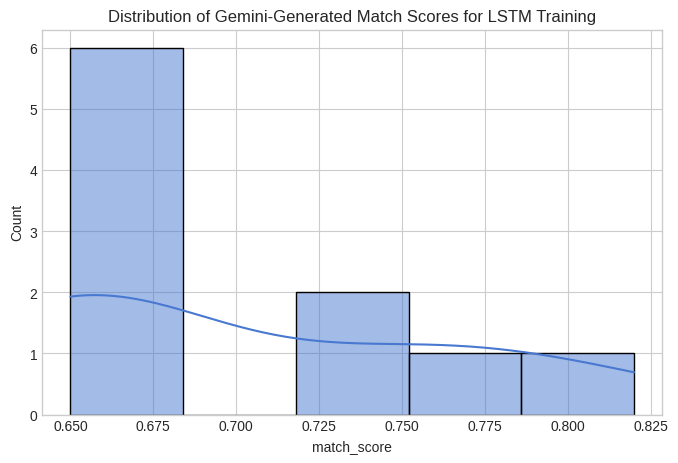

In [29]:
# **Note:** This step involves making API calls to Gemini. Adjust `max_gemini_calls_lstm_data` as needed.
# For a full run, this might take time and incur API costs.
lstm_training_data_gemini_labeled = [] # Renamed to avoid conflict
max_gemini_calls_lstm_data = 10
gemini_api_call_count_lstm = 0

if not job_df.empty and sample_resumes and gemini_pro_model:
    print(f"Generating LSTM training data using Gemini. Max API calls for this run: {max_gemini_calls_lstm_data}")

    # Create a smaller job_df sample if job_df is too large for the API call limit
    # This ensures we try to get labels for more resumes rather than many jobs for one resume.
    jobs_to_process_df = job_df.sample(min(len(job_df), max_gemini_calls_lstm_data)) if len(job_df) > 5 else job_df

    for resume_info in sample_resumes: # Iterate through all available resumes
        if gemini_api_call_count_lstm >= max_gemini_calls_lstm_data:
            print(f"Reached API call limit ({max_gemini_calls_lstm_data}) for LSTM data generation.")
            break

        resume_text_lstm_data = resume_info["text"]
        print(f"\nProcessing Resume ID for LSTM data: {resume_info['id']}")

        # Iterate over a sample of jobs or all jobs if small enough
        for _, job_row_lstm_data in jobs_to_process_df.iterrows():
            if gemini_api_call_count_lstm >= max_gemini_calls_lstm_data:
                break

            job_title_lstm_data = job_row_lstm_data.get("Job Title", "N/A")
            print(f"  Pairing with Job: {job_title_lstm_data} for LSTM data...")

            # Get full job details for Gemini prompt
            job_details_for_gemini_lstm = parse_job_description_entry(job_row_lstm_data)["raw_full_job_data_for_gemini"]

            gemini_analysis_lstm = analyze_resume_with_gemini_notebook(
                resume_text_lstm_data,
                job_details_for_gemini_lstm,
                gemini_pro_model
            )
            gemini_api_call_count_lstm += 1

            if gemini_analysis_lstm and "error" not in gemini_analysis_lstm and "match_score" in gemini_analysis_lstm:
                match_score_val = gemini_analysis_lstm.get("match_score")
                if isinstance(match_score_val, (int, float)): # Ensure score is numeric
                    lstm_training_data_gemini_labeled.append({
                        "resume_text": resume_text_lstm_data,
                        "job_text": job_row_lstm_data.get("Job Description", ""), # Core job text for LSTM input
                        "match_score": float(match_score_val) / 100.0  # Normalize score to 0-1
                    })
                    print(f"    Gemini Score for LSTM data ({resume_info['id']}, {job_title_lstm_data}): {match_score_val}%")
                else:
                    print(f"    Gemini score for ({resume_info['id']}, {job_title_lstm_data}) is not numeric: {match_score_val}. Skipping.")
            else:
                print(f"    Failed to get valid Gemini score for LSTM data ({resume_info['id']}, {job_title_lstm_data}). Skipping.")

    lstm_train_df = pd.DataFrame(lstm_training_data_gemini_labeled) # Assign to the main df name

    if not lstm_train_df.empty:
        print(f"\nGenerated {len(lstm_train_df)} training examples for LSTM using Gemini scores.")
        print(lstm_train_df.head())
        print("\nDescriptive statistics of Gemini-based match scores for LSTM:")
        print(lstm_train_df['match_score'].describe())
        plt.figure(figsize=(8, 5))
        sns.histplot(lstm_train_df['match_score'], kde=True, bins=max(1, len(lstm_train_df)//2)) # Adjust bins
        plt.title("Distribution of Gemini-Generated Match Scores for LSTM Training")
        plt.savefig(os.path.join(OUTPUT_DIR, "lstm_gemini_score_distribution.png"))
        plt.show()
    else:
        print("No LSTM training data generated using Gemini scores. LSTM training might fail or use no data.")
        lstm_train_df = pd.DataFrame() # Ensure it's an empty DF

elif not gemini_pro_model:
    print("Gemini Pro model not available. Cannot generate LSTM training data with Gemini labels.")
    lstm_train_df = pd.DataFrame()
else:
    print("Cannot generate LSTM training data: Job data or sample resumes are missing/empty.")
    lstm_train_df = pd.DataFrame()


### 7.1.1 Download and Prepare Pre-trained Word Embeddings (GloVe)

In [30]:
GLOVE_DIR = "embeddings" # Create this folder in Colab and upload GloVe file there
GLOVE_FILENAME = "glove.6B.100d.txt" # Change if using a different GloVe file
GLOVE_EMBEDDING_PATH = os.path.join(GLOVE_DIR, GLOVE_FILENAME)
EMBEDDING_DIM_LSTM = 100 # Must match the GloVe file dimension (e.g., 100d for glove.6B.100d.txt)

if not os.path.exists(GLOVE_DIR):
    os.makedirs(GLOVE_DIR)
    print(f"Created directory: {GLOVE_DIR}. Please upload your GloVe file there if you intend to use it.")

def load_glove_embeddings(glove_path, word_index_tokenizer, max_words_vocab, embedding_dim_param):
    if not os.path.exists(glove_path):
        print(f"GloVe file not found at {glove_path}. LSTM will train embeddings from scratch.")
        return None

    embeddings_index = {}
    try:
        with open(glove_path, encoding='utf-8') as f:
            for line in f:
                values = line.split()
                word = values[0]
                coefs = np.asarray(values[1:], dtype='float32')
                embeddings_index[word] = coefs
    except Exception as e:
        print(f"Error loading GloVe file: {e}")
        return None

    print(f"Found {len(embeddings_index)} word vectors in GloVe file: {glove_path}")

    num_words_embedding_matrix = min(max_words_vocab, len(word_index_tokenizer) + 1)
    embedding_matrix = np.zeros((num_words_embedding_matrix, embedding_dim_param))

    words_not_found_count = 0
    for word, i in word_index_tokenizer.items():
        if i >= num_words_embedding_matrix:
            continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
        else:
            words_not_found_count += 1

    print(f"GloVe Embedding matrix shape: {embedding_matrix.shape}")
    print(f"Words in tokenizer not found in GloVe: {words_not_found_count}")
    return embedding_matrix

glove_embedding_matrix_lstm = None # Initialize

Created directory: embeddings. Please upload your GloVe file there if you intend to use it.


### 7.2 Text Preprocessing for LSTM

In [31]:
# Check if lstm_train_df is valid before proceeding
if 'lstm_train_df' in locals() and not lstm_train_df.empty and len(lstm_train_df) >= 2 : # Need at least 2 for train/val split
    MAX_NUM_WORDS_LSTM = 20000
    MAX_SEQUENCE_LENGTH_RESUME_LSTM = 500
    MAX_SEQUENCE_LENGTH_JOB_LSTM = 500

    all_texts_lstm = pd.concat([lstm_train_df['resume_text'], lstm_train_df['job_text']]).astype(str)

    tokenizer_lstm = Tokenizer(num_words=MAX_NUM_WORDS_LSTM, oov_token="<unk>")
    tokenizer_lstm.fit_on_texts(all_texts_lstm)
    word_index_lstm = tokenizer_lstm.word_index
    print(f"LSTM Tokenizer: Found {len(word_index_lstm)} unique tokens.")

    glove_embedding_matrix_lstm = load_glove_embeddings(
        GLOVE_EMBEDDING_PATH, word_index_lstm, MAX_NUM_WORDS_LSTM, EMBEDDING_DIM_LSTM
    )

    resume_sequences_lstm = tokenizer_lstm.texts_to_sequences(lstm_train_df['resume_text'].astype(str))
    job_sequences_lstm = tokenizer_lstm.texts_to_sequences(lstm_train_df['job_text'].astype(str))

    data_resumes_padded_lstm = pad_sequences(resume_sequences_lstm, maxlen=MAX_SEQUENCE_LENGTH_RESUME_LSTM, padding='post', truncating='post')
    data_jobs_padded_lstm = pad_sequences(job_sequences_lstm, maxlen=MAX_SEQUENCE_LENGTH_JOB_LSTM, padding='post', truncating='post')
    labels_lstm = lstm_train_df['match_score'].values

    # Stratify if possible, requires at least 2 samples per class for binary-like labels
    can_stratify = len(np.unique(labels_lstm > 0.5)) > 1 and len(labels_lstm) >= (2 * len(np.unique(labels_lstm > 0.5)))

    X_resume_train_lstm, X_resume_val_lstm, \
    X_job_train_lstm, X_job_val_lstm, \
    y_train_lstm, y_val_lstm = train_test_split(
        data_resumes_padded_lstm, data_jobs_padded_lstm, labels_lstm,
        test_size=0.2, random_state=42,
        # stratify=(labels_lstm > 0.5) if can_stratify else None
    )
    print(f"LSTM training resume sequences shape: {X_resume_train_lstm.shape}")
    lstm_data_prepared = True
else:
    print("LSTM training DataFrame (`lstm_train_df`) is empty or has too few samples. Skipping LSTM preprocessing and model building.")
    lstm_data_prepared = False
    # Define placeholders to avoid NameErrors later if model isn't built
    lstm_model = None
    tokenizer_lstm = None
    MAX_SEQUENCE_LENGTH_RESUME_LSTM = 500 # Default
    MAX_SEQUENCE_LENGTH_JOB_LSTM = 500    # Default

LSTM Tokenizer: Found 177 unique tokens.
GloVe file not found at embeddings/glove.6B.100d.txt. LSTM will train embeddings from scratch.
LSTM training resume sequences shape: (8, 500)


### 7.3 LSTM Model Architecture (Siamese-like with Optional Pre-trained Embeddings)


In [32]:
if lstm_data_prepared:
    num_words_for_embedding_lstm = min(MAX_NUM_WORDS_LSTM, len(word_index_lstm) + 1)

    # Resume Branch
    input_resume_lstm =tf.keras.Input(shape=(MAX_SEQUENCE_LENGTH_RESUME_LSTM,), name="resume_input_lstm") # Changed to tf.keras.Input
    if glove_embedding_matrix_lstm is not None:
        embedding_resume_layer_lstm = tf.keras.layers.Embedding( # Changed to tf.keras.layers.Embedding
            input_dim=num_words_for_embedding_lstm, output_dim=EMBEDDING_DIM_LSTM,
            weights=[glove_embedding_matrix_lstm], input_length=MAX_SEQUENCE_LENGTH_RESUME_LSTM,
            trainable=False # Set to True to fine-tune GloVe, False to keep fixed
        )
    else:
        embedding_resume_layer_lstm = tf.keras.layers.Embedding( # Changed to tf.keras.layers.Embedding
            input_dim=num_words_for_embedding_lstm, output_dim=EMBEDDING_DIM_LSTM,
            input_length=MAX_SEQUENCE_LENGTH_RESUME_LSTM, trainable=True
        )
    embedded_resume_lstm = embedding_resume_layer_lstm(input_resume_lstm)
    lstm_out_resume = tf.keras.layers.LSTM(128, dropout=0.3, recurrent_dropout=0.3)(embedded_resume_lstm) # Changed to tf.keras.layers.LSTM

    # Job Branch
    input_job_lstm = tf.keras.Input(shape=(MAX_SEQUENCE_LENGTH_JOB_LSTM,), name="job_input_lstm") # Changed to tf.keras.Input
    if glove_embedding_matrix_lstm is not None:
        embedding_job_layer_lstm = tf.keras.layers.Embedding( # Changed to tf.keras.layers.Embedding
            input_dim=num_words_for_embedding_lstm, output_dim=EMBEDDING_DIM_LSTM,
            weights=[glove_embedding_matrix_lstm], input_length=MAX_SEQUENCE_LENGTH_JOB_LSTM,
            trainable=False
        )
    else:
        embedding_job_layer_lstm = tf.keras.layers.Embedding( # Changed to tf.keras.layers.Embedding
            input_dim=num_words_for_embedding_lstm, output_dim=EMBEDDING_DIM_LSTM,
            input_length=MAX_SEQUENCE_LENGTH_JOB_LSTM, trainable=True
        )
    embedded_job_lstm = embedding_job_layer_lstm(input_job_lstm)
    lstm_out_job = tf.keras.layers.LSTM(128, dropout=0.3, recurrent_dropout=0.3)(embedded_job_lstm) # Changed to tf.keras.layers.LSTM

    concatenated_lstm = tf.keras.layers.Concatenate()([lstm_out_resume, lstm_out_job]) # Changed to tf.keras.layers.Concatenate
    dense1_lstm = tf.keras.layers.Dense(128, activation='relu')(concatenated_lstm) # Changed to tf.keras.layers.Dense
    dropout1_lstm = tf.keras.layers.Dropout(0.5)(dense1_lstm) # Changed to tf.keras.layers.Dropout
    dense2_lstm = tf.keras.layers.Dense(64, activation='relu')(dropout1_lstm) # Changed to tf.keras.layers.Dense
    dropout2_lstm = tf.keras.layers.Dropout(0.5)(dense2_lstm) # Changed to tf.keras.layers.Dropout
    output_lstm = tf.keras.layers.Dense(1, activation='sigmoid', name="match_output_lstm")(dropout2_lstm) # Changed to tf.keras.layers.Dense

    lstm_model = tf.keras.Model(inputs=[input_resume_lstm, input_job_lstm], outputs=output_lstm) # Changed to tf.keras.Model
    optimizer_lstm = tf.keras.optimizers.Adam(learning_rate=0.0005) # Changed to tf.keras.optimizers.Adam
    lstm_model.compile(optimizer=optimizer_lstm, loss='mean_squared_error', metrics=['mae',tf.keras.metrics.RootMeanSquaredError()])
    lstm_model.summary()
else:
    print("Skipping LSTM model architecture definition as data was not prepared.")
    lstm_model = None # Ensure it's None

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ resume_input_lstm   │ (None, 500)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ job_input_lstm      │ (None, 500)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 500, 100)  │     17,800 │ resume_input_lst… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 500, 100)  │     17,800 │ job_input_lstm[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 128)       │    117,248 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 128)       │    117,248 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 256)       │          0 │ lstm[0][0],       │
│ (Concatenate)       │                   │            │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │     32,896 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ match_output_lstm   │ (None, 1)         │         65 │ dropout_1[0][0]   │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 311,313 (1.19 MB)

 Trainable params: 311,313 (1.19 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Check CUDA Version:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0


In [34]:
!nvidia-smi

Tue May 13 12:25:41 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P0             26W /   70W |     110MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### 7.4 Train the LSTM Model

Clearing Keras session and collecting garbage...
Training LSTM model...
Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - loss: 0.0492 - mae: 0.2110 - root_mean_squared_error: 0.2217 - val_loss: 0.0246 - val_mae: 0.1561 - val_root_mean_squared_error: 0.1568
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0454 - mae: 0.2027 - root_mean_squared_error: 0.2131 - val_loss: 0.0218 - val_mae: 0.1469 - val_root_mean_squared_error: 0.1477
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0423 - mae: 0.1959 - root_mean_squared_error: 0.2057 - val_loss: 0.0193 - val_mae: 0.1383 - val_root_mean_squared_error: 0.1391
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0408 - mae: 0.1940 - root_mean_squared_error: 0.2020 - val_loss: 0.0170 - val_mae: 0.1294 - val_root_mean_squared_error: 0.1303
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0365 - mae: 0.1781 - root_mean_squared_error: 0.1911 - val_loss: 0.0145 - val_mae: 0.1197 - val_root_mean_squared_error: 0.1206
E

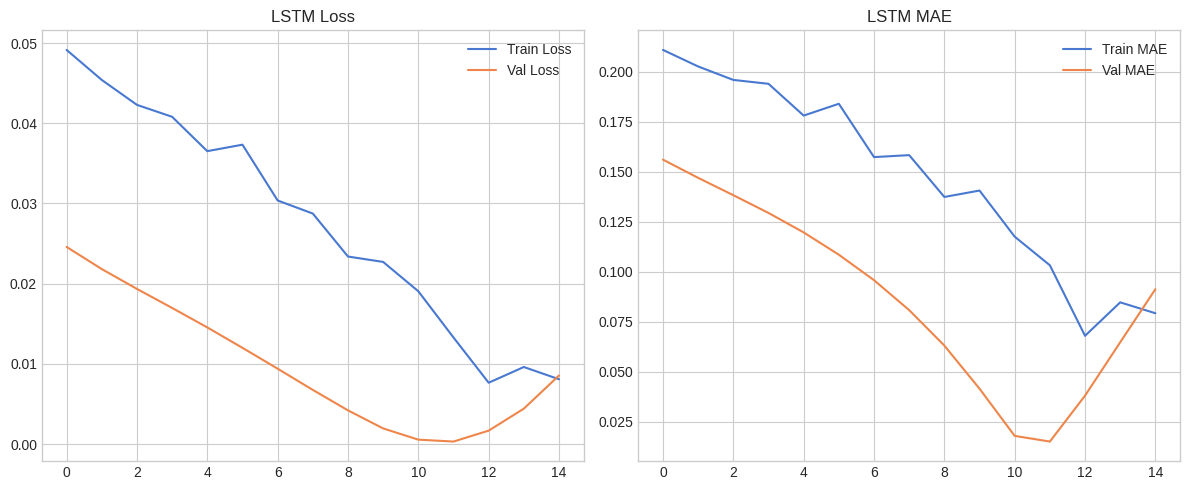

LSTM model saved to outputs/lstm_resume_matcher_model.keras
LSTM Tokenizer saved to outputs/lstm_tokenizer.json


In [35]:
# ### 7.4 Train the LSTM Model

if lstm_model and lstm_data_prepared and X_resume_train_lstm.shape[0] > 0 : # Check if training data exists
    print("Clearing Keras session and collecting garbage...")
    K.clear_session() # Clear previous session
    import gc
    gc.collect() # Garbage collect

    print("Training LSTM model...")
    history_lstm = lstm_model.fit(
        [X_resume_train_lstm, X_job_train_lstm], y_train_lstm,
        validation_data=([X_resume_val_lstm, X_job_val_lstm], y_val_lstm),
        epochs=15, # Adjust epochs (more if data is larger/better)
        batch_size=16, # Smaller batch size for potentially small dataset
        callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)] # Use tf.keras.callbacks
    )
    print("LSTM Model training complete.")

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1);
    plt.plot(history_lstm.history['loss'], label='Train Loss')
    plt.plot(history_lstm.history['val_loss'], label='Val Loss');
    plt.title('LSTM Loss');
    plt.legend()
    plt.subplot(1, 2, 2);
    plt.plot(history_lstm.history['mae'], label='Train MAE')
    plt.plot(history_lstm.history['val_mae'], label='Val MAE');
    plt.title('LSTM MAE');
    plt.legend()
    plt.tight_layout();
    plt.savefig(os.path.join(OUTPUT_DIR, "lstm_training_history.png"));
    plt.show()

    MODEL_SAVE_PATH_LSTM = os.path.join(OUTPUT_DIR, "lstm_resume_matcher_model.keras")
    TOKENIZER_SAVE_PATH_LSTM = os.path.join(OUTPUT_DIR, "lstm_tokenizer.json")
    lstm_model.save(MODEL_SAVE_PATH_LSTM)
    tokenizer_json_lstm = tokenizer_lstm.to_json() # Save the string representation
    with open(TOKENIZER_SAVE_PATH_LSTM, 'w', encoding='utf-8') as f:
        # Keras tokenizer.to_json() already returns a JSON string, so no need for json.dumps
        f.write(tokenizer_json_lstm)
    print(f"LSTM model saved to {MODEL_SAVE_PATH_LSTM}")
    print(f"LSTM Tokenizer saved to {TOKENIZER_SAVE_PATH_LSTM}")
else:
    print("Skipping LSTM model training: model not built, data not prepared, or no training samples.")



### 7.5 LSTM Prediction Function


In [36]:
def predict_match_with_lstm(resume_text_pred, job_text_pred, trained_lstm_model, lstm_tokenizer_inst, max_len_res, max_len_job):
    if not trained_lstm_model or not lstm_tokenizer_inst:
        print("LSTM Model or tokenizer not available for prediction.")
        return None
    try:
        resume_seq_pred = lstm_tokenizer_inst.texts_to_sequences([resume_text_pred])
        resume_padded_pred = pad_sequences(resume_seq_pred, maxlen=max_len_res, padding='post', truncating='post')
        job_seq_pred = lstm_tokenizer_inst.texts_to_sequences([job_text_pred])
        job_padded_pred = pad_sequences(job_seq_pred, maxlen=max_len_job, padding='post', truncating='post')

        prediction_val = trained_lstm_model.predict([resume_padded_pred, job_padded_pred], verbose=0)
        return prediction_val[0][0] * 100 # Denormalize
    except Exception as e:
        print(f"Error during LSTM prediction: {e}")
        return None


In [37]:
# Test LSTM prediction
if lstm_model and tokenizer_lstm and not job_df.empty and sample_resumes and len(sample_resumes) > 1 and len(job_df) > 1:
    lstm_score_test = predict_match_with_lstm(
        sample_resumes[1]["text"], job_df.iloc[1]["Job Description"],
        lstm_model, tokenizer_lstm, MAX_SEQUENCE_LENGTH_RESUME_LSTM, MAX_SEQUENCE_LENGTH_JOB_LSTM
    )
    if lstm_score_test is not None: print(f"Test LSTM Predicted Score: {lstm_score_test:.2f}%")


Test LSTM Predicted Score: 67.40%


## 8. Transformer Model (Fine-tuning DistilBERT)
##### Uses `lstm_train_df` (with Gemini scores) for training.


### 8.1 Prepare Data for Transformer


In [38]:
transformer_data_prepared = False
if 'lstm_train_df' in locals() and not lstm_train_df.empty and len(lstm_train_df) >=2:
    transformer_df_source = lstm_train_df.copy()
    transformer_df_source['text'] = transformer_df_source['resume_text'] + " [SEP] " + transformer_df_source['job_text']
    transformer_df_source = transformer_df_source.rename(columns={'match_score': 'labels'})
    transformer_df_source = transformer_df_source[['text', 'labels']]

    train_texts_tf, val_texts_tf, train_labels_tf, val_labels_tf = train_test_split(
        transformer_df_source['text'].tolist(), transformer_df_source['labels'].tolist(),
        test_size=0.2, random_state=42
    )

    MODEL_NAME_TF = 'distilbert-base-uncased'
    try:
        tokenizer_tf = DistilBertTokenizerFast.from_pretrained(MODEL_NAME_TF)
        train_encodings_tf = tokenizer_tf(train_texts_tf, truncation=True, padding=True, max_length=512)
        val_encodings_tf = tokenizer_tf(val_texts_tf, truncation=True, padding=True, max_length=512)

        train_dataset_tf = Dataset.from_dict({'input_ids': train_encodings_tf['input_ids'], 'attention_mask': train_encodings_tf['attention_mask'], 'labels': train_labels_tf})
        val_dataset_tf = Dataset.from_dict({'input_ids': val_encodings_tf['input_ids'], 'attention_mask': val_encodings_tf['attention_mask'], 'labels': val_labels_tf})

        if len(train_dataset_tf) > 0 and len(val_dataset_tf) > 0:
             print(f"Transformer data prepared: {len(train_dataset_tf)} train, {len(val_dataset_tf)} val samples.")
             transformer_data_prepared = True
        else:
            print("Transformer dataset is empty after tokenization. Check input data and tokenization process.")

    except Exception as e:
        print(f"Error preparing data for Transformer: {e}")
        # Define placeholders to prevent NameErrors
        train_dataset_tf = None
        val_dataset_tf = None
        tokenizer_tf = None
else:
    print("`lstm_train_df` for Transformer is empty or has too few samples. Skipping Transformer setup.")
    train_dataset_tf = None
    val_dataset_tf = None
    tokenizer_tf = None


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Transformer data prepared: 8 train, 2 val samples.


### 8.2 Load Pre-trained Transformer Model

In [39]:
model_tf = None # Initialize
if transformer_data_prepared:
    try:
        model_tf = DistilBertForSequenceClassification.from_pretrained(MODEL_NAME_TF, num_labels=1)
        device_tf = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model_tf.to(device_tf)
        print(f"DistilBERT model loaded for regression on device: {device_tf}")
    except Exception as e:
        print(f"Error loading DistilBERT model: {e}")
else:
    print("Transformer data not prepared. Skipping model loading.")

# %% [markdown]



model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBERT model loaded for regression on device: cuda


### 8.3 Define Metrics and Training Arguments for Transformer

In [40]:
def compute_metrics_regression_tf(eval_pred):
    logits, labels = eval_pred
    predictions = logits.squeeze()
    mse = mean_squared_error(labels, predictions)
    return {'mse': mse, 'rmse': np.sqrt(mse), 'mae': mean_absolute_error(labels, predictions)}

training_args_tf = None # Initialize
if model_tf and transformer_data_prepared:
    TRANSFORMER_MODEL_OUTPUT_DIR = os.path.join(OUTPUT_DIR, "transformer_resume_matcher_model")
    training_args_tf = TrainingArguments(
        output_dir=TRANSFORMER_MODEL_OUTPUT_DIR, num_train_epochs=5, # More epochs if data is good
        per_device_train_batch_size=4, per_device_eval_batch_size=4,
        warmup_steps=max(1, len(train_dataset_tf) // (4 * 2) ), # ~10% of total steps for warmup
        weight_decay=0.01, logging_dir=os.path.join(TRANSFORMER_MODEL_OUTPUT_DIR, 'logs'),
        logging_steps=max(1, len(train_dataset_tf) // (4*10)), # Log ~10 times per epoch
        # evaluation_strategy="epoch", save_strategy="epoch", load_best_model_at_end=True,
        metric_for_best_model="rmse", greater_is_better=False,
        optim="adamw_torch_fused" # Use fused AdamW if on Ampere GPU or newer for speed, else adamw_torch
    )
else:
    print("Transformer model or data not ready. Skipping TrainingArguments.")


### 8.4 Initialize and Train the Transformer

In [41]:
trainer_tf = None # Initialize
if model_tf and training_args_tf and train_dataset_tf and val_dataset_tf:
    trainer_tf = Trainer(
        model=model_tf, args=training_args_tf,
        train_dataset=train_dataset_tf, eval_dataset=val_dataset_tf,
        compute_metrics=compute_metrics_regression_tf, tokenizer=tokenizer_tf
    )
    print("Transformer Trainer initialized. Starting fine-tuning...")
    try:
        train_result_tf = trainer_tf.train()
        # trainer_tf.log_metrics("train", train_result_tf.metrics) # Already logged by Trainer
        # trainer_tf.save_metrics("train", train_result_tf.metrics)
        trainer_tf.save_model(TRANSFORMER_MODEL_OUTPUT_DIR) # Saves model and tokenizer
        print(f"Fine-tuned Transformer model saved to {TRANSFORMER_MODEL_OUTPUT_DIR}")
    except Exception as e:
        print(f"Error during Transformer model training: {e}")
else:
    print("Prerequisites for Transformer training not met. Skipping training.")

<ipython-input-41-06747ad5f94f>:3: FutureWarning:

`tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


Transformer Trainer initialized. Starting fine-tuning...


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: seidykante (seidykante-kocaeli-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
1,0.687900
2,0.646600
3,0.371500
4,0.071400
5,0.009400
6,0.002500
7,0.007000
8,0.024900
9,0.015800
10,0.020800


Fine-tuned Transformer model saved to outputs/transformer_resume_matcher_model


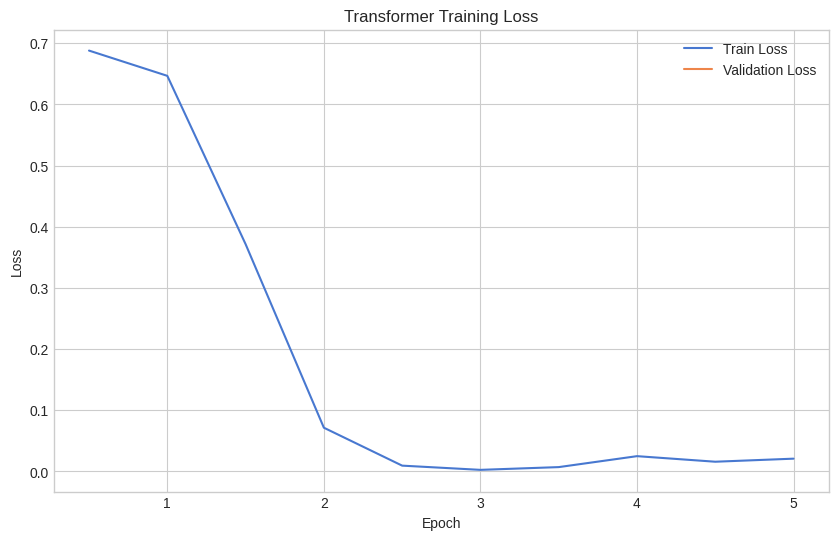

Saved transformer_training_loss.png


In [51]:
if trainer_tf and hasattr(trainer_tf, 'state') and hasattr(trainer_tf.state, 'log_history'):
        logs = trainer_tf.state.log_history

        # Filter logs for loss and evaluation metrics
        train_loss = [log['loss'] for log in logs if 'loss' in log and 'eval_loss' not in log]
        eval_loss = [log['eval_loss'] for log in logs if 'eval_loss' in log]

        # For plotting vs epoch, we need to map steps to epochs.
        # Trainer logs include 'epoch' for evaluation steps and sometimes for training steps.
        train_epochs = [log['epoch'] for log in logs if 'loss' in log and 'eval_loss' not in log]
        eval_epochs = [log['epoch'] for log in logs if 'eval_loss' in log]

        if train_loss and eval_loss and train_epochs and eval_epochs:
            plt.figure(figsize=(10, 6))
            plt.plot(train_epochs, train_loss, label='Train Loss')
            plt.plot(eval_epochs, eval_loss, label='Validation Loss')
            plt.title('Transformer Training Loss')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.legend()
            plt.grid(True)
            plt.savefig(os.path.join(OUTPUT_DIR, "transformer_training_loss.png"))
            plt.show()
            print("Saved transformer_training_loss.png")

### 8.5 Evaluate the Fine-tuned Transformer Model

In [52]:
if trainer_tf and val_dataset_tf:
    print("\nEvaluating the fine-tuned Transformer model...")
    eval_metrics_tf = trainer_tf.evaluate(eval_dataset=val_dataset_tf)
    print(f"Transformer Eval metrics: {eval_metrics_tf}")
    trainer_tf.log_metrics("eval", eval_metrics_tf) # Already logged by Trainer
    trainer_tf.save_metrics("eval", eval_metrics_tf)
else:
    print("Transformer trainer or validation data not available. Skipping evaluation.")



Evaluating the fine-tuned Transformer model...


Transformer Eval metrics: {'eval_loss': 0.0013144820695742965, 'eval_mse': 0.0013144820695742965, 'eval_rmse': 0.03625578670466684, 'eval_mae': 0.033985525369644165, 'eval_runtime': 0.0356, 'eval_samples_per_second': 56.155, 'eval_steps_per_second': 28.078, 'epoch': 5.0}
***** eval metrics *****
  epoch                   =        5.0
  eval_loss               =     0.0013
  eval_mae                =      0.034
  eval_mse                =     0.0013
  eval_rmse               =     0.0363
  eval_runtime            = 0:00:00.03
  eval_samples_per_second =     56.155
  eval_steps_per_second   =     28.078


### 8.6 Transformer Prediction Function


In [53]:
def predict_match_with_transformer(resume_text_tf_pred, job_text_tf_pred, model_path_tf_load, tokenizer_path_tf_load=None):
    if tokenizer_path_tf_load is None: tokenizer_path_tf_load = model_path_tf_load

    if not os.path.exists(model_path_tf_load) or not os.path.exists(tokenizer_path_tf_load):
        print(f"Transformer model/tokenizer path not found: {model_path_tf_load} or {tokenizer_path_tf_load}")
        return None
    try:
        loaded_tokenizer_tf_pred = DistilBertTokenizerFast.from_pretrained(tokenizer_path_tf_load)
        loaded_model_tf_pred = DistilBertForSequenceClassification.from_pretrained(model_path_tf_load)
        device_pred_tf_func = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        loaded_model_tf_pred.to(device_pred_tf_func)
        loaded_model_tf_pred.eval()
    except Exception as e:
        print(f"Error loading fine-tuned Transformer model/tokenizer: {e}")
        return None

    combined_text_pred = resume_text_tf_pred + " [SEP] " + job_text_tf_pred
    inputs_pred = loaded_tokenizer_tf_pred(combined_text_pred, return_tensors="pt", truncation=True, padding=True, max_length=512)
    inputs_pred = {k: v.to(device_pred_tf_func) for k, v in inputs_pred.items()}

    with torch.no_grad():
        outputs_pred = loaded_model_tf_pred(**inputs_pred)
        score_normalized = outputs_pred.logits.item()
    return max(0.0, min(100.0, score_normalized * 100.0))

In [54]:
# Test Transformer prediction
if 'TRANSFORMER_MODEL_OUTPUT_DIR' in locals() and os.path.exists(TRANSFORMER_MODEL_OUTPUT_DIR) and \
   not job_df.empty and sample_resumes and len(sample_resumes) > 0 and len(job_df) > 0:
    tf_score_test = predict_match_with_transformer(
        sample_resumes[0]["text"], job_df.iloc[0]["Job Description"], TRANSFORMER_MODEL_OUTPUT_DIR
    )
    if tf_score_test is not None: print(f"Test Transformer Predicted Score: {tf_score_test:.2f}%")


Test Transformer Predicted Score: 69.06%


## 9. Comparison of Models
#### Compare predictions from Gemini, LSTM, Transformer, and Rule-Based Matcher.



### 9.1 Helper: Load LSTM Model and Tokenizer

In [55]:

lstm_resources_loaded_for_comparison = False
def ensure_lstm_resources_loaded():
    global lstm_model, tokenizer_lstm, lstm_resources_loaded_for_comparison # Allow modification of global variables

    if lstm_resources_loaded_for_comparison: # Already loaded and checked
        return True

    lstm_model_path_comp = os.path.join(OUTPUT_DIR, "lstm_resume_matcher_model.keras")
    tokenizer_path_comp = os.path.join(OUTPUT_DIR, "lstm_tokenizer.json")

    # Check if 'lstm_model' exists and is a Keras model, or try to load
    if not ('lstm_model' in globals() and isinstance(lstm_model, tf.keras.Model)):
        if os.path.exists(lstm_model_path_comp):
            try:
                lstm_model = tf.keras.models.load_model(lstm_model_path_comp)
                print("Comparison: LSTM model loaded from disk.")
            except Exception as e:
                print(f"Comparison: Error loading LSTM model from {lstm_model_path_comp}: {e}")
                lstm_model = None # Ensure it's None on failure
        else:
            print(f"Comparison: LSTM model file not found at {lstm_model_path_comp}.")
            lstm_model = None

    # Check if 'tokenizer_lstm' exists and is a Keras tokenizer, or try to load
    if not ('tokenizer_lstm' in globals() and isinstance(tokenizer_lstm, tf.keras.preprocessing.text.Tokenizer)):
        if os.path.exists(tokenizer_path_comp):
            try:
                with open(tokenizer_path_comp, 'r', encoding='utf-8') as f:
                    tokenizer_json_loaded_comp = f.read() # Read the entire string
                    tokenizer_lstm = tf.keras.preprocessing.text.tokenizer_from_json(tokenizer_json_loaded_comp)
                print("Comparison: Keras Tokenizer for LSTM loaded from disk.")
            except Exception as e:
                print(f"Comparison: Error loading Keras Tokenizer from {tokenizer_path_comp}: {e}")
                tokenizer_lstm = None # Ensure it's None on failure
        else:
            print(f"Comparison: Keras Tokenizer file not found at {tokenizer_path_comp}.")
            tokenizer_lstm = None

    if lstm_model and tokenizer_lstm:
        lstm_resources_loaded_for_comparison = True
        return True
    return False


### 9.2 Select Test Cases for Comparison


In [56]:
comparison_test_cases = []
if 'sample_resumes' in locals() and 'job_df' in locals() and not job_df.empty and len(sample_resumes) > 0:
    num_resumes = len(sample_resumes)
    num_jobs_total = len(job_df)

    # Add a few diverse test cases if data allows
    if num_resumes >= 1 and num_jobs_total >= 1:
        comparison_test_cases.append({'name': f"Resume 0 vs Job 0", 'resume_idx': 0, 'job_idx': 0})
    if num_resumes >= 2 and num_jobs_total >= 2:
         # Try to pick a job that might be a good fit for the second resume if possible
        ds_job_indices = job_df[job_df['Job Title'].str.contains("Data Scientist", case=False, na=False)].index
        job_idx_for_resume1 = ds_job_indices[0] if not ds_job_indices.empty else 1 # Fallback to index 1
        comparison_test_cases.append({'name': f"Resume 1 vs Job {job_idx_for_resume1}", 'resume_idx': 1, 'job_idx': job_idx_for_resume1})

    # Include the user-uploaded CV if it exists
    user_cv_idx = next((i for i, r_info in enumerate(sample_resumes) if r_info["id"] == "user_uploaded_cv"), None)
    if user_cv_idx is not None and num_jobs_total >= 1:
        # Match user CV against the first job, and maybe a job related to "Software" if CV is techy
        comparison_test_cases.append({'name': f"User CV vs Job 14", 'resume_idx': user_cv_idx, 'job_idx': 14})
        swe_job_indices = job_df[job_df['Job Title'].str.contains("Engineer|Software|Developer", case=False, na=False)].index
        if not swe_job_indices.empty and swe_job_indices[0] != 0 and num_jobs_total > swe_job_indices[0]: # Avoid duplicate job and ensure index exists
             comparison_test_cases.append({'name': f"User CV vs Job {swe_job_indices[0]} (Tech)", 'resume_idx': user_cv_idx, 'job_idx': swe_job_indices[0]})

    # Ensure unique test cases by (resume_idx, job_idx) pair before printing
    unique_test_cases_tuples = set()
    final_comparison_test_cases = []
    for tc in comparison_test_cases:
        if (tc['resume_idx'], tc['job_idx']) not in unique_test_cases_tuples:
            final_comparison_test_cases.append(tc)
            unique_test_cases_tuples.add((tc['resume_idx'], tc['job_idx']))
    comparison_test_cases = final_comparison_test_cases

    print(f"Selected {len(comparison_test_cases)} unique test cases for comparison:")
    for tc_print in comparison_test_cases: print(f"  - {tc_print['name']}")
else:
    print("Warning: `sample_resumes` or `job_df` not ready. Cannot create comparison test cases.")


Selected 3 unique test cases for comparison:
  - Resume 0 vs Job 0
  - Resume 1 vs Job 4
  - User CV vs Job 14


### 9.3 Run Predictions for Comparison


In [47]:
comparison_results_list = []

if not comparison_test_cases:
    print("No test cases for comparison. Skipping predictions.")
else:
    lstm_ready_comp = ensure_lstm_resources_loaded() # Load LSTM resources once

    for case_info in comparison_test_cases:
        print(f"\n--- Comparing for: {case_info['name']} ---")
        res_idx, job_idx_comp = case_info['resume_idx'], case_info['job_idx']

        # Basic check for indices, though they should be valid from selection logic
        if res_idx >= len(sample_resumes) or job_idx_comp >= len(job_df):
            print(f"  Skipping {case_info['name']} due to out-of-bounds index after selection (should not happen).")
            continue

        current_resume_details = sample_resumes[res_idx]
        current_job_details_row = job_df.iloc[job_idx_comp]

        res_text_comp = current_resume_details["text"]
        job_text_for_ml_models = current_job_details_row.get("Job Description", "")

        # For Gemini, use the full job data dictionary
        job_data_for_gemini_comp = parse_job_description_entry(current_job_details_row)["raw_full_job_data_for_gemini"]

        current_scores = {"Test Case": case_info['name'],
                          "Resume": current_resume_details.get("filename", current_resume_details["id"]),
                          "Job Title": current_job_details_row.get("Job Title", f"job_{job_idx_comp}")}

        # 1. Gemini Pro
        if gemini_pro_model:
            print("  Predicting with Gemini Pro...")
            gemini_res = analyze_resume_with_gemini_notebook(res_text_comp, job_data_for_gemini_comp, gemini_pro_model)
            current_scores["Gemini Pro (%)"] = gemini_res.get("match_score", "Error") if gemini_res and "error" not in gemini_res else "Error/NA"
        else: current_scores["Gemini Pro (%)"] = "Not Avail."

        # 2. LSTM
        if lstm_ready_comp and lstm_model and tokenizer_lstm: # Check global vars again
            print("  Predicting with LSTM...")
            lstm_pred_score = predict_match_with_lstm(
                res_text_comp, job_text_for_ml_models, lstm_model, tokenizer_lstm,
                MAX_SEQUENCE_LENGTH_RESUME_LSTM, MAX_SEQUENCE_LENGTH_JOB_LSTM
            )
            current_scores["LSTM (%)"] = f"{lstm_pred_score:.2f}" if lstm_pred_score is not None else "Error/NA"
        else: current_scores["LSTM (%)"] = "Not Avail."

        # 3. Transformer
        transformer_model_path_comp = os.path.join(OUTPUT_DIR, "transformer_resume_matcher_model")
        if os.path.exists(transformer_model_path_comp):
            print("  Predicting with Transformer...")
            tf_pred_score_comp = predict_match_with_transformer(
                res_text_comp, job_text_for_ml_models, transformer_model_path_comp
            )
            current_scores["Transformer (%)"] = f"{tf_pred_score_comp:.2f}" if tf_pred_score_comp is not None else "Error/NA"
        else: current_scores["Transformer (%)"] = "Not Avail. (Model not found)"

        # 4. Rule-Based
        if 'rule_based_matcher' in globals() and 'ALL_SKILLS_VOCAB' in globals(): # Check functions exist
            print("  Predicting with Rule-Based Matcher...")
            res_skills_rb = extract_skills_from_text(res_text_comp, ALL_SKILLS_VOCAB)
            res_exp_rb = extract_experience_years_from_text(res_text_comp)
            job_parsed_rb = parse_job_description_entry(current_job_details_row)
            rb_score = rule_based_matcher(res_skills_rb, res_exp_rb, job_parsed_rb["skills_list"], job_parsed_rb["experience_level_raw"])
            current_scores["Rule-Based (%)"] = rb_score
        else: current_scores["Rule-Based (%)"] = "Not Avail."

        comparison_results_list.append(current_scores)

if comparison_results_list:
    comparison_df_final = pd.DataFrame(comparison_results_list)
    print("\n\n--- Model Comparison Results Table ---")
    print(comparison_df_final.to_string())
else:
    print("\nNo model comparison results were generated.")
    comparison_df_final = pd.DataFrame()



--- Comparing for: Resume 0 vs Job 0 ---
  Predicting with Gemini Pro...
  Predicting with LSTM...
  Predicting with Transformer...

--- Comparing for: Resume 1 vs Job 4 ---
  Predicting with Gemini Pro...
  Predicting with LSTM...
  Predicting with Transformer...

--- Comparing for: User CV vs Job 14 ---
  Predicting with Gemini Pro...
  Predicting with LSTM...
  Predicting with Transformer...


--- Model Comparison Results Table ---
           Test Case                                Resume             Job Title  Gemini Pro (%) LSTM (%) Transformer (%) Rule-Based (%)
0  Resume 0 vs Job 0                     resume_sample_swe  Mobile App Developer              65    67.40           69.06     Not Avail.
1  Resume 1 vs Job 4                      resume_sample_ds        Data Scientist              65    67.40           70.60     Not Avail.
2  User CV vs Job 14  SEIDY_KANTE_Professional_Resume.docx     Software Engineer              75    67.27           67.29     Not Avail.


### 9.4 Visualize Comparison Results


Comparison plot saved to outputs/model_comparison_scores_final.png


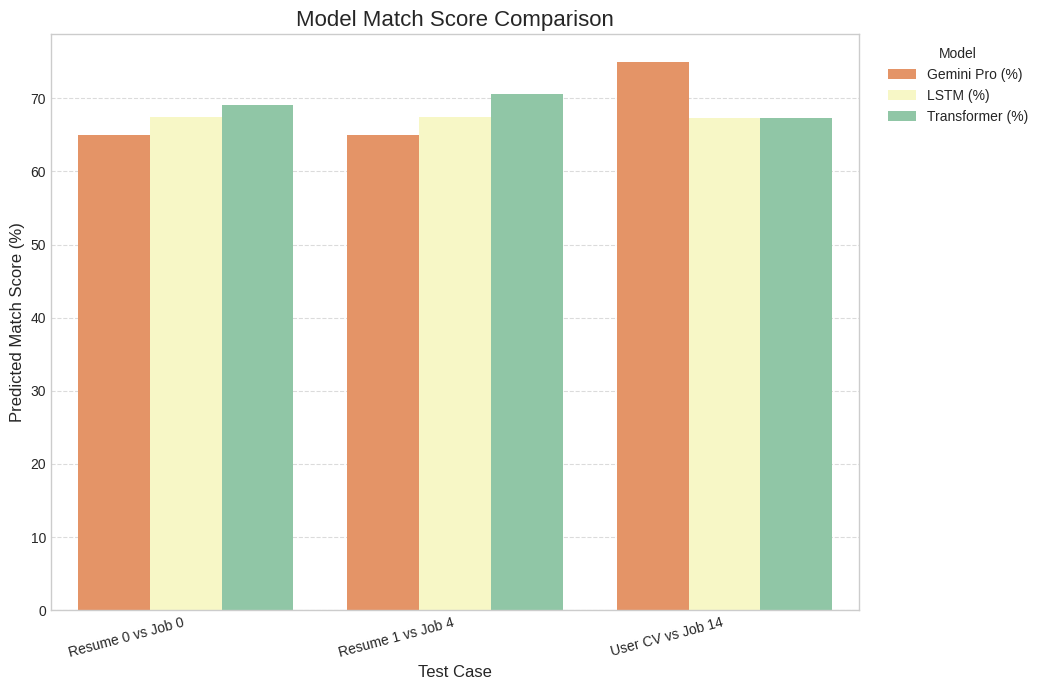

In [57]:
if not comparison_df_final.empty:
    score_cols_final = ["Gemini Pro (%)", "LSTM (%)", "Transformer (%)", "Rule-Based (%)"]
    for col_name in score_cols_final:
        if col_name in comparison_df_final.columns:
            comparison_df_final[col_name] = pd.to_numeric(comparison_df_final[col_name], errors='coerce')

    df_melted_final = comparison_df_final.melt(
        id_vars=["Test Case", "Resume", "Job Title"], value_vars=score_cols_final,
        var_name="Model", value_name="Match Score (%)"
    ).dropna(subset=["Match Score (%)"])

    if not df_melted_final.empty:
        plt.figure(figsize=(max(12, len(df_melted_final['Test Case'].unique()) * 3), 7)) # Dynamic width
        sns.barplot(x="Test Case", y="Match Score (%)", hue="Model", data=df_melted_final, palette="Spectral")
        plt.title("Model Match Score Comparison", fontsize=16)
        plt.ylabel("Predicted Match Score (%)", fontsize=12)
        plt.xlabel("Test Case", fontsize=12)
        plt.xticks(rotation=15, ha='right', fontsize=10)
        plt.legend(title="Model", bbox_to_anchor=(1.02, 1), loc='upper left')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout(rect=[0, 0, 0.88, 1]) # Adjust rect to make space for legend

        comp_plot_path_final = os.path.join(OUTPUT_DIR, "model_comparison_scores_final.png")
        plt.savefig(comp_plot_path_final)
        print(f"\nComparison plot saved to {comp_plot_path_final}")
        plt.show()


    else:
        print("No valid numeric scores to plot for final comparison.")
else:
    print("Final comparison DataFrame is empty. Skipping visualization.")

Detailed comparison plot saved to outputs/model_comparison_detailed_final.png


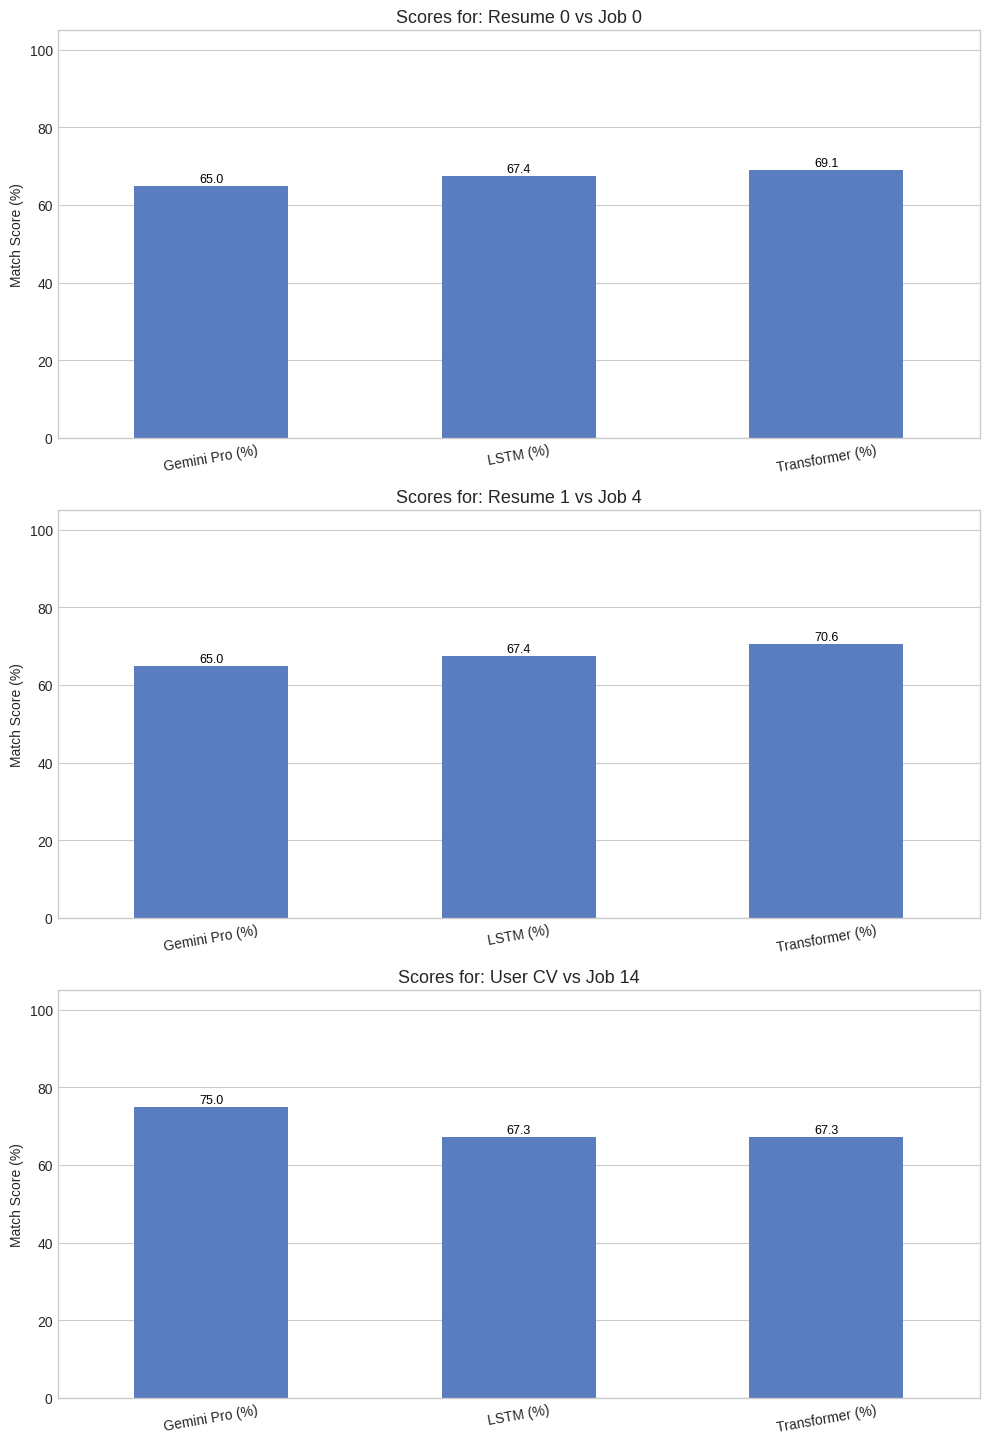

In [59]:
if not df_melted_final.empty:
    # Individual plots per test case
    unique_test_names = df_melted_final["Test Case"].unique()
    if len(unique_test_names) > 0:
        num_plots = len(unique_test_names)
        fig_ind, axes_ind = plt.subplots(num_plots, 1, figsize=(10, 5 * num_plots), squeeze=False) # Ensure axes_ind is always 2D array
        axes_ind = axes_ind.flatten() # Flatten to 1D for easy iteration

        for i, test_case_iter_name in enumerate(unique_test_names):
            ax_curr = axes_ind[i]
            case_data_iter = df_melted_final[df_melted_final["Test Case"] == test_case_iter_name]
            # sns.barplot(x="Model", y="Match Score (%)", data=case_data_iter, ax=ax_curr, palette="viridis", width=0.5)
            sns.barplot(x="Model", y="Match Score (%)", data=case_data_iter, ax=ax_curr, palette=None, width=0.5)
            ax_curr.set_title(f"Scores for: {test_case_iter_name}", fontsize=13)
            ax_curr.set_xlabel("")
            ax_curr.set_ylabel("Match Score (%)")
            ax_curr.tick_params(axis='x', rotation=10)
            ax_curr.set_ylim(0, 105) # Consistent Y-axis
            for p_bar in ax_curr.patches:
                ax_curr.annotate(f"{p_bar.get_height():.1f}", (p_bar.get_x() + p_bar.get_width() / 2., p_bar.get_height()),
                                  ha='center', va='center', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')

        plt.tight_layout(rect=[0,0,1,0.97])
        detailed_comp_plot_path = os.path.join(OUTPUT_DIR, "model_comparison_detailed_final.png")
        plt.savefig(detailed_comp_plot_path)
        print(f"Detailed comparison plot saved to {detailed_comp_plot_path}")
        plt.show()
else:
    print("No valid numeric scores to plot for final comparison.")